---
title: 'STATS 202 Homework 3'
project:
  output-dir: output
format: pdf
author: "Alistair Keiller"
execute: 
  enabled: true
---

In [120]:
import csv
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from autogluon.tabular import TabularPredictor
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from IPython.display import display

sns.set_theme()

In [97]:
path = "FinalProjectData"

data = pd.concat(
    [pd.read_csv(os.path.join(path, f)) for f in os.listdir(path) if f.endswith(".csv")]
)
data["PSUM"] = np.sum([data["P" + str(n)] for n in range(1, 8)], axis=0)
data["NSUM"] = np.sum([data["N" + str(n)] for n in range(1, 8)], axis=0)
data["GSUM"] = np.sum([data["G" + str(n)] for n in range(1, 17)], axis=0)
data["Treatment"] = data["TxGroup"] == "Treatment"
data["Flagged"] = data["LeadStatus"] != "Passed"
data["categoryPatientID"] = data["PatientID"].astype("category")
data["categorySiteID"] = data["SiteID"].astype("category")
data["categoryRaterID"] = data["RaterID"].astype("category")
data["categoryAssessmentID"] = data["AssessmentID"].astype("category")
PANSS_parts = [
    "P1",
    "P2",
    "P3",
    "P4",
    "P5",
    "P6",
    "P7",
    "N1",
    "N2",
    "N3",
    "N4",
    "N5",
    "N6",
    "N7",
    "G1",
    "G2",
    "G3",
    "G4",
    "G5",
    "G6",
    "G7",
    "G8",
    "G9",
    "G10",
    "G11",
    "G12",
    "G13",
    "G14",
    "G15",
    "G16",
]
data

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,LeadStatus,PSUM,NSUM,GSUM,Treatment,Flagged,categoryPatientID,categorySiteID,categoryRaterID,categoryAssessmentID
0,A,USA,10001,20035,30076,100679,Control,0,5,5,...,Assign to CS,30,24,53,False,True,10001,20035,30076,100679
1,A,USA,10001,20035,30076,101017,Control,11,5,5,...,Assign to CS,30,25,54,False,True,10001,20035,30076,101017
2,A,USA,10001,20035,30076,102177,Control,18,4,4,...,Passed,23,24,44,False,False,10001,20035,30076,102177
3,A,USA,10001,20035,30076,101533,Control,25,3,3,...,Flagged,19,22,39,False,True,10001,20035,30076,101533
4,A,USA,10001,20035,30076,100930,Control,39,3,3,...,Flagged,19,21,37,False,True,10001,20035,30076,100930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,D,China,40223,80001,120013,400496,Treatment,17,4,3,...,Flagged,18,21,40,True,True,40223,80001,120013,400496
2944,D,China,40223,80001,120013,402261,Treatment,21,4,3,...,Flagged,18,18,35,True,True,40223,80001,120013,402261
2945,D,China,40223,80001,120013,400605,Treatment,28,4,3,...,Flagged,19,19,36,True,True,40223,80001,120013,400605
2946,D,China,40223,80001,120013,402460,Treatment,42,4,3,...,Flagged,19,20,38,True,True,40223,80001,120013,402460


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PANSS_Total   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     3467.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:00:00   Log-Likelihood:                -64467.
No. Observations:               15841   AIC:                         1.289e+05
Df Residuals:                   15837   BIC:                         1.290e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     82.9635      0.222    374.211      0.000      82.529      83.398
Treatment[T.True]             -1.0590      0.320     -3.310      0.001      -1.686      -0.432
VisitDay                      -0.1177      0.002    -73.833      0.000      -0.121      -0.115
VisitDay:Treatment[T.True]     0.0053      0.002      2.330      0.020       0.001       0.010
==============================================================================
Omnibus:                      418.754   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.541
Skew:                           0.351   Prob(JB):                    9.13e-109
Kurtosis:                       3.512   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

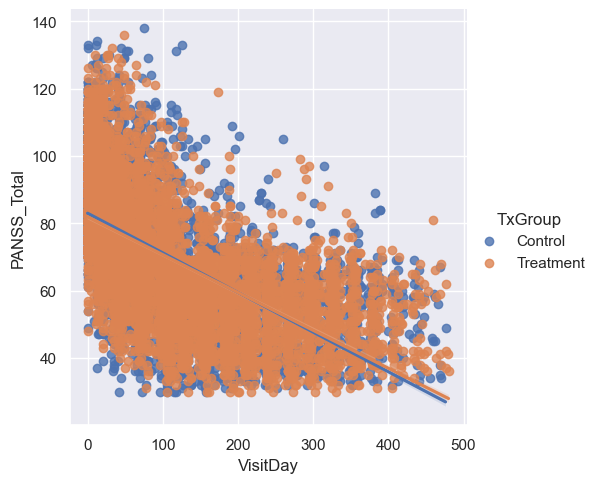

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PSUM   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     2627.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:00:01   Log-Likelihood:                -48160.
No. Observations:               15841   AIC:                         9.633e+04
Df Residuals:                   15837   BIC:                         9.636e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     19.9753      0.079    252.221      0.000      19.820      20.131
Treatment[T.True]             -0.3030      0.114     -2.652      0.008      -0.527      -0.079
VisitDay                      -0.0366      0.001    -64.317      0.000      -0.038      -0.036
VisitDay:Treatment[T.True]     0.0017      0.001      2.087      0.037       0.000       0.003
==============================================================================
Omnibus:                      786.417   Durbin-Watson:                   0.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              907.748
Skew:                           0.571   Prob(JB):                    7.67e-198
Kurtosis:                       3.269   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

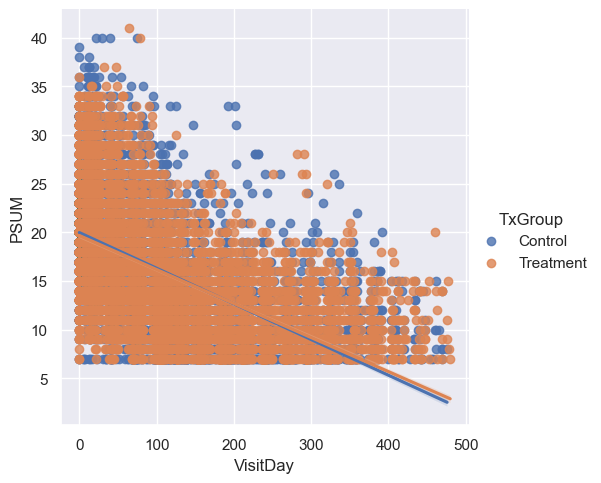

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NSUM   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1291.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:00:02   Log-Likelihood:                -47217.
No. Observations:               15841   AIC:                         9.444e+04
Df Residuals:                   15837   BIC:                         9.447e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     22.2323      0.075    297.944      0.000      22.086      22.379
Treatment[T.True]             -0.1657      0.108     -1.539      0.124      -0.377       0.045
VisitDay                      -0.0238      0.001    -44.299      0.000      -0.025      -0.023
VisitDay:Treatment[T.True]     0.0003      0.001      0.367      0.713      -0.001       0.002
==============================================================================
Omnibus:                      166.462   Durbin-Watson:                   0.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.395
Skew:                           0.219   Prob(JB):                     4.08e-40
Kurtosis:                       3.287   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

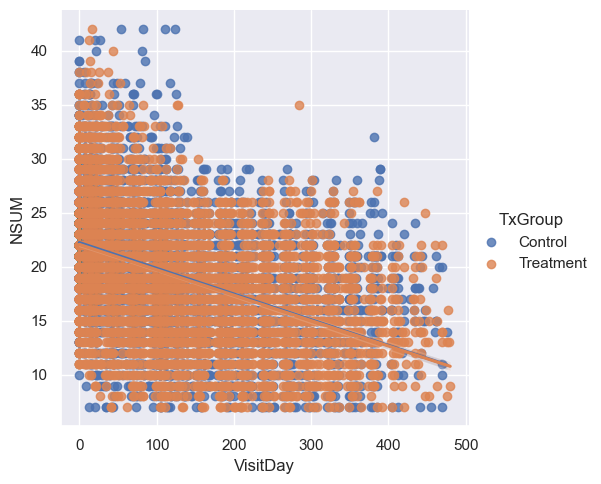

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GSUM   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     2979.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:00:03   Log-Likelihood:                -54166.
No. Observations:               15841   AIC:                         1.083e+05
Df Residuals:                   15837   BIC:                         1.084e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     40.7559      0.116    352.228      0.000      40.529      40.983
Treatment[T.True]             -0.5903      0.167     -3.535      0.000      -0.918      -0.263
VisitDay                      -0.0573      0.001    -68.877      0.000      -0.059      -0.056
VisitDay:Treatment[T.True]     0.0033      0.001      2.799      0.005       0.001       0.006
==============================================================================
Omnibus:                      500.923   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.379
Skew:                           0.406   Prob(JB):                    9.38e-127
Kurtosis:                       3.470   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

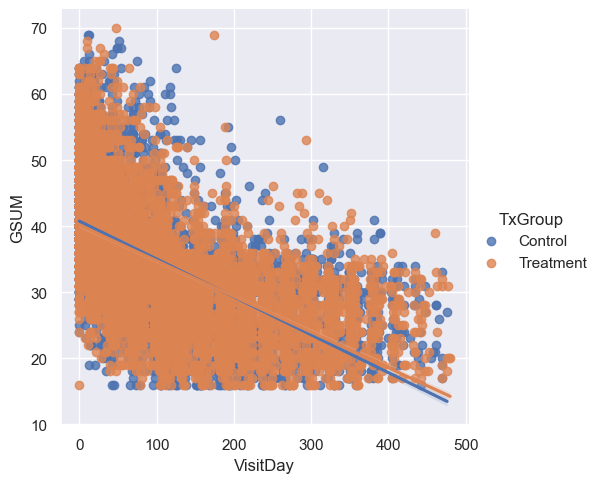

In [99]:
# fig, axs = plt.subplots(2, 2)
for metric in ["PANSS_Total", "PSUM", "NSUM", "GSUM"]:
    display(
        smf.ols(
            metric + " ~ VisitDay*Treatment", data=data[data.LeadStatus == "Passed"]
        )
        .fit()
        .summary()
    )
    sns.lmplot(
        x="VisitDay",
        y=metric,
        data=data[data.LeadStatus == "Passed"],
        hue="TxGroup",
    )
    plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PANSS_Total   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     173.4
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           2.63e-96
Time:                        17:00:04   Log-Likelihood:                -6161.8
No. Observations:                1481   AIC:                         1.233e+04
Df Residuals:                    1477   BIC:                         1.235e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    102.4107      0.910    112.534      0.000     100.626     104.196
Treatment[T.True]             -2.1407      1.331     -1.608      0.108      -4.751       0.470
VisitDay                      -0.3264      0.019    -16.983      0.000      -0.364      -0.289
VisitDay:Treatment[T.True]     0.0274      0.028      0.992      0.321      -0.027       0.082
==============================================================================
Omnibus:                        7.435   Durbin-Watson:                   0.704
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.908
Skew:                           0.123   Prob(JB):                       0.0192
Kurtosis:                       3.260   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

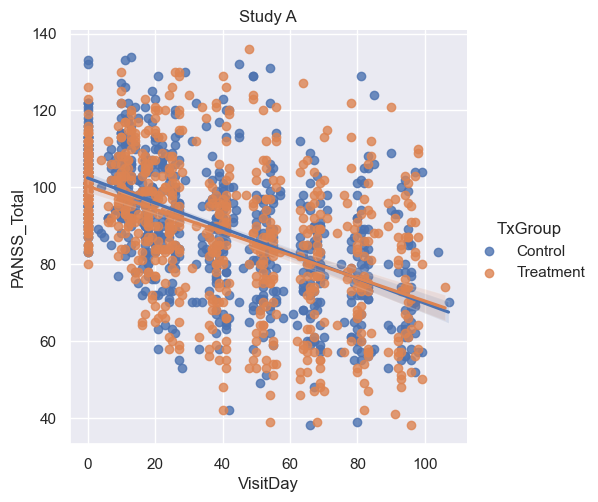

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PANSS_Total   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     196.0
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.79e-105
Time:                        17:00:04   Log-Likelihood:                -5574.1
No. Observations:                1351   AIC:                         1.116e+04
Df Residuals:                    1347   BIC:                         1.118e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     86.4533      0.841    102.825      0.000      84.804      88.103
Treatment[T.True]             -3.8783      1.221     -3.176      0.002      -6.274      -1.483
VisitDay                      -0.1629      0.009    -18.390      0.000      -0.180      -0.145
VisitDay:Treatment[T.True]     0.0182      0.013      1.411      0.158      -0.007       0.043
==============================================================================
Omnibus:                        3.664   Durbin-Watson:                   0.535
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                3.124
Skew:                          -0.017   Prob(JB):                        0.210
Kurtosis:                       2.767   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

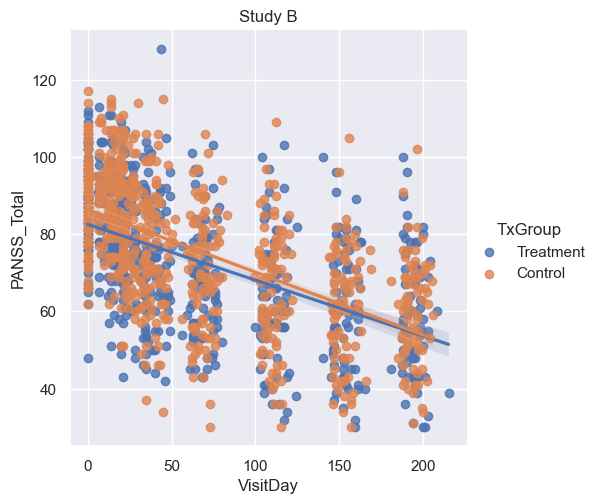

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PANSS_Total   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     2988.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:00:04   Log-Likelihood:                -50478.
No. Observations:               12671   AIC:                         1.010e+05
Df Residuals:                   12667   BIC:                         1.010e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     80.4327      0.234    344.072      0.000      79.974      80.891
Treatment[T.True]             -0.6699      0.338     -1.982      0.047      -1.332      -0.007
VisitDay                      -0.1057      0.002    -68.204      0.000      -0.109      -0.103
VisitDay:Treatment[T.True]     0.0034      0.002      1.543      0.123      -0.001       0.008
==============================================================================
Omnibus:                      418.983   Durbin-Watson:                   0.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.576
Skew:                           0.350   Prob(JB):                    1.15e-127
Kurtosis:                       3.785   Cond. No.                         582.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

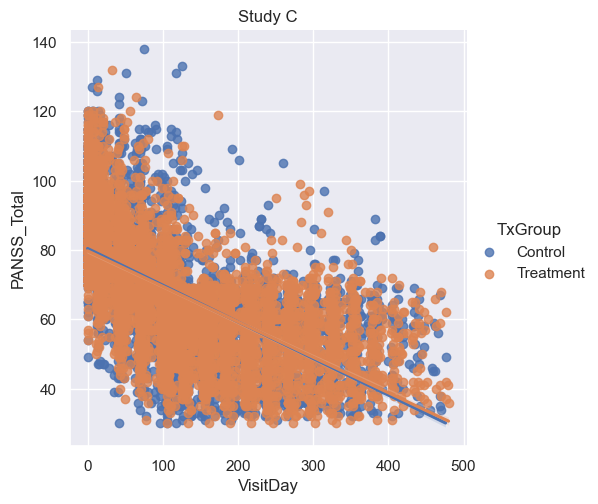

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PANSS_Total   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     25.59
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           6.31e-15
Time:                        17:00:05   Log-Likelihood:                -1399.8
No. Observations:                 338   AIC:                             2808.
Df Residuals:                     334   BIC:                             2823.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     72.7208      1.754     41.467      0.000      69.271      76.171
Treatment[T.True]              5.3461      2.292      2.333      0.020       0.838       9.854
VisitDay                      -0.0883      0.022     -4.057      0.000      -0.131      -0.046
VisitDay:Treatment[T.True]    -0.0304      0.027     -1.133      0.258      -0.083       0.022
==============================================================================
Omnibus:                        2.082   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.766
Skew:                          -0.035   Prob(JB):                        0.414
Kurtosis:                       2.653   Cond. No.                         353.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

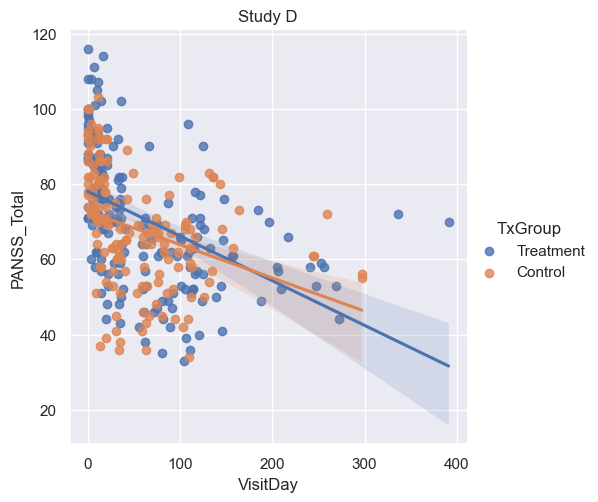

In [100]:
for study in ["A", "B", "C", "D"]:
    display(
        smf.ols(
            "PANSS_Total ~ VisitDay*Treatment",
            data=data[(data.Study == study) & (data.LeadStatus == "Passed")],
        )
        .fit()
        .summary()
    )
    sns.lmplot(
        x="VisitDay",
        y="PANSS_Total",
        data=data[(data.Study == study) & (data.LeadStatus == "Passed")],
        hue="TxGroup",
    )
    plt.title("Study " + study)
    plt.show()

# 2 Patient segmentation

In [101]:
first_day_passed_data = data[
    (data.LeadStatus == "Passed") & (data.VisitDay == 0)
].copy()
scaled_numerical_first_day_passed_data = StandardScaler().fit_transform(
    first_day_passed_data[PANSS_parts]
)

In [102]:
first_day_passed_data.std().to_frame("std")

/var/folders/8f/dmypnd_j6h5gwtjwt90wyw680000gn/T/ipykernel_36943/3154830931.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  first_day_passed_data.std().to_frame("std")


,std
PatientID,6991.029928
SiteID,13548.260422
RaterID,20341.623132
AssessmentID,69617.309584
VisitDay,0.000000
P1,1.103957
P2,1.132898
P3,1.523532
P4,1.043822
P5,1.314784


In [103]:
len(first_day_passed_data["PatientID"])

1747

In [104]:
len(np.unique(first_day_passed_data["PatientID"]))

1745

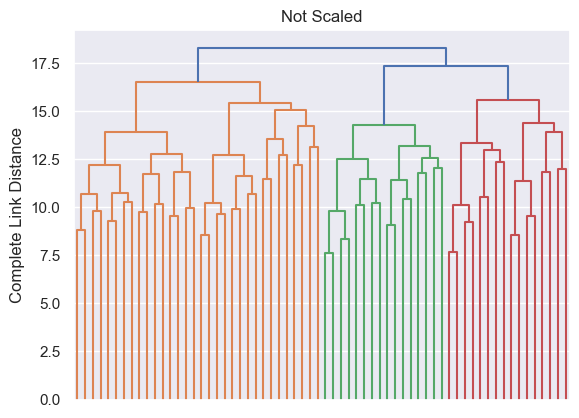

In [105]:
dendrogram(
    linkage(first_day_passed_data[PANSS_parts], method="complete"),
    truncate_mode="level",
    p=5,
    no_labels=True,
    color_threshold=17,
)
plt.title("Not Scaled")
plt.ylabel("Complete Link Distance")
plt.show()

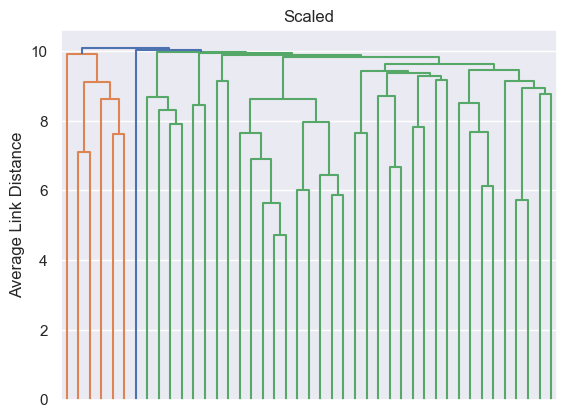

In [106]:
dendrogram(
    linkage(scaled_numerical_first_day_passed_data, method="average"),
    truncate_mode="level",
    p=10,
    no_labels=True,
    color_threshold=10,
)
plt.title("Scaled")
plt.ylabel("Average Link Distance")
plt.show()

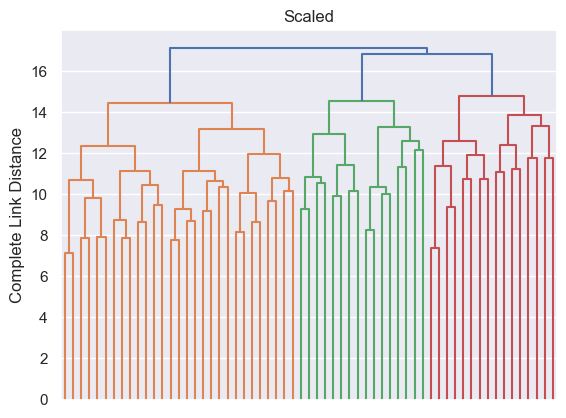

In [107]:
dendrogram(
    linkage(scaled_numerical_first_day_passed_data, method="complete"),
    truncate_mode="level",
    p=5,
    no_labels=True,
    color_threshold=16,
)
plt.title("Scaled")
plt.ylabel("Complete Link Distance")
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/final/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/final/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/final/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/final/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

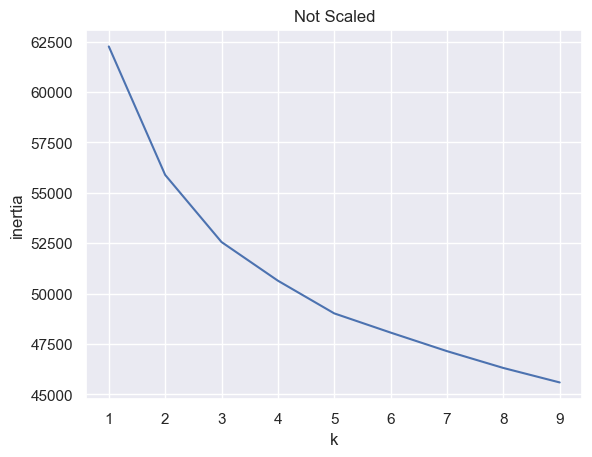

In [108]:
sns.lineplot(
    x=range(1, 10),
    y=[
        KMeans(n_clusters=n, random_state=42)
        .fit(first_day_passed_data[PANSS_parts])
        .inertia_
        for n in range(1, 10)
    ],
)
plt.title("Not Scaled")
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/final/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/final/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/final/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/final/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

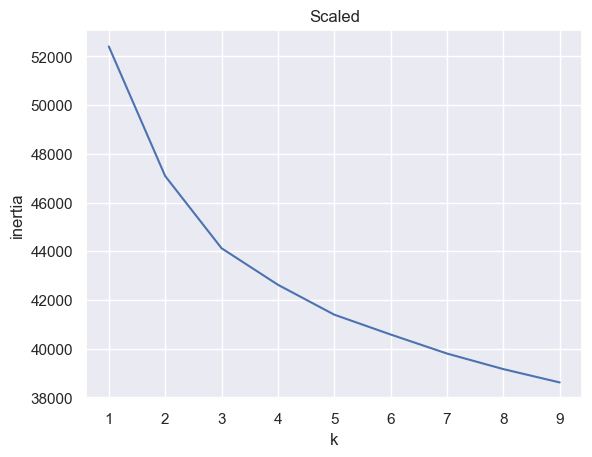

In [109]:
sns.lineplot(
    x=range(1, 10),
    y=[
        KMeans(n_clusters=n, random_state=42)
        .fit(scaled_numerical_first_day_passed_data)
        .inertia_
        for n in range(1, 10)
    ],
)
plt.title("Scaled")
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

In [127]:
first_day_passed_data["Cluster"] = (
    AgglomerativeClustering(n_clusters=3, linkage="complete")
    .fit(scaled_numerical_first_day_passed_data)
    .labels_
)

/var/folders/8f/dmypnd_j6h5gwtjwt90wyw680000gn/T/ipykernel_36943/2810127443.py:18: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


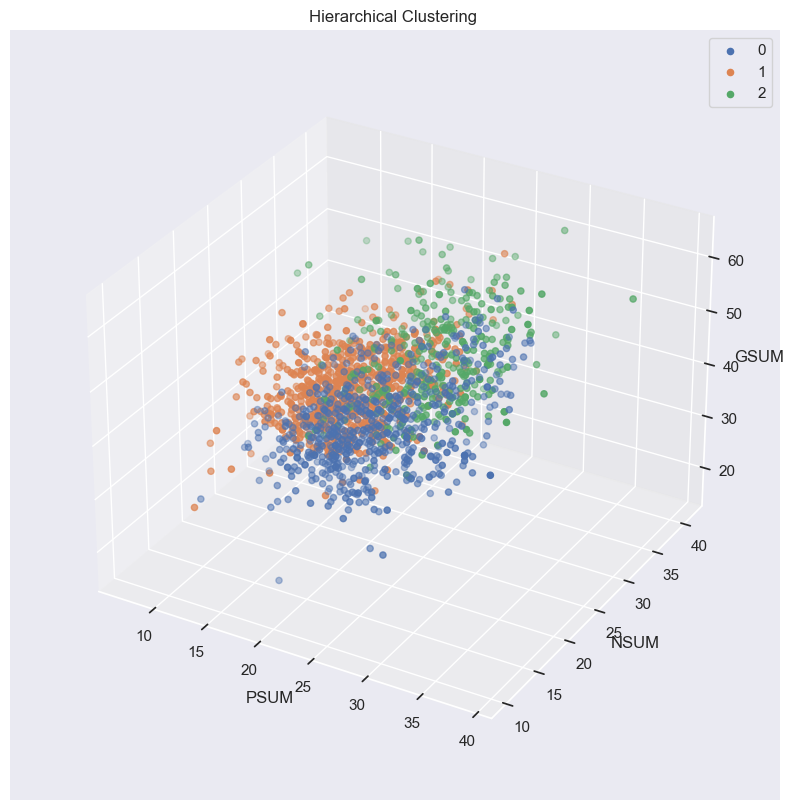

In [129]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
for cluster in np.unique(first_day_passed_data.Cluster):
    first_day_passed_data_in_cluster = first_day_passed_data[
        first_day_passed_data.Cluster == cluster
    ]
    ax.scatter(
        first_day_passed_data_in_cluster.PSUM,
        first_day_passed_data_in_cluster.NSUM,
        first_day_passed_data_in_cluster.GSUM,
        label=cluster,
    )
ax.legend()
ax.set_xlabel("PSUM")
ax.set_ylabel("NSUM")
ax.set_zlabel("GSUM")
plt.title("Hierarchical Clustering ")
ax.dist = 11
plt.show()

In [110]:
first_day_passed_data["Cluster"] = (
    KMeans(n_clusters=3, random_state=42)
    .fit(scaled_numerical_first_day_passed_data)
    .labels_
)

/opt/homebrew/Caskroom/miniconda/base/envs/final/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/var/folders/8f/dmypnd_j6h5gwtjwt90wyw680000gn/T/ipykernel_36943/130017485.py:18: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


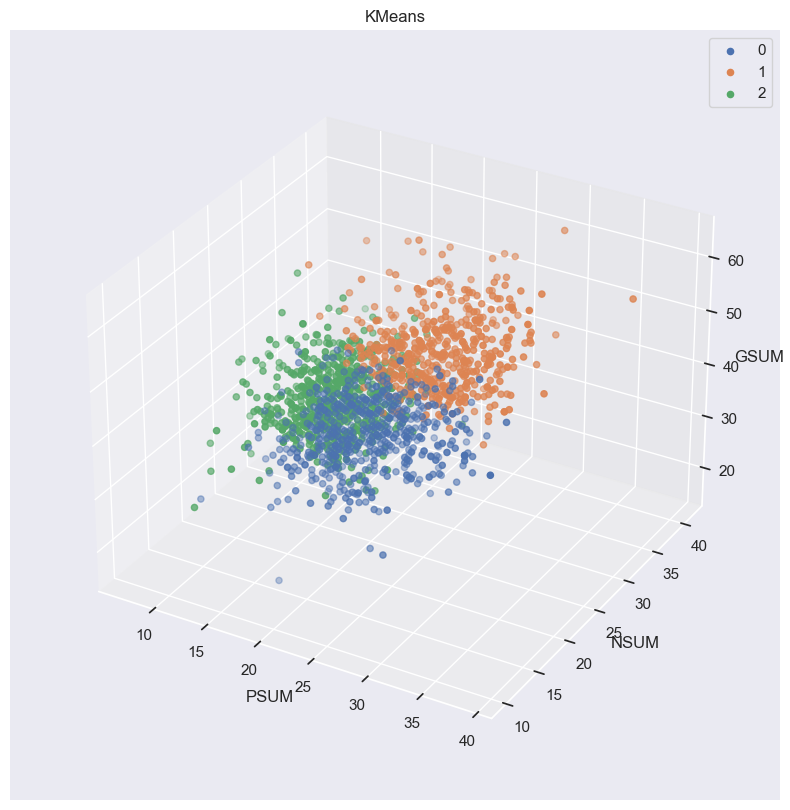

In [119]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
for cluster in np.unique(first_day_passed_data.Cluster):
    first_day_passed_data_in_cluster = first_day_passed_data[
        first_day_passed_data.Cluster == cluster
    ]
    ax.scatter(
        first_day_passed_data_in_cluster.PSUM,
        first_day_passed_data_in_cluster.NSUM,
        first_day_passed_data_in_cluster.GSUM,
        label=cluster,
    )
ax.legend()
ax.set_xlabel("PSUM")
ax.set_ylabel("NSUM")
ax.set_zlabel("GSUM")
plt.title("KMeans")
ax.dist = 11
plt.show()

In [ ]:
first_day_passed_data["Cluster"] = (
    KMeans(n_clusters=3, random_state=42)
    .fit(scaled_numerical_first_day_passed_data)
    .labels_
)

In [112]:
first_day_passed_data.groupby("Cluster")[
    ["PANSS_Total", "PSUM", "NSUM", "GSUM"]
].mean().reset_index()

,Cluster,PANSS_Total,PSUM,NSUM,GSUM
0,0,83.567944,23.243902,18.993031,41.331010
1,1,102.056311,25.300971,26.928155,49.827184
2,2,80.577508,17.320669,23.671733,39.585106


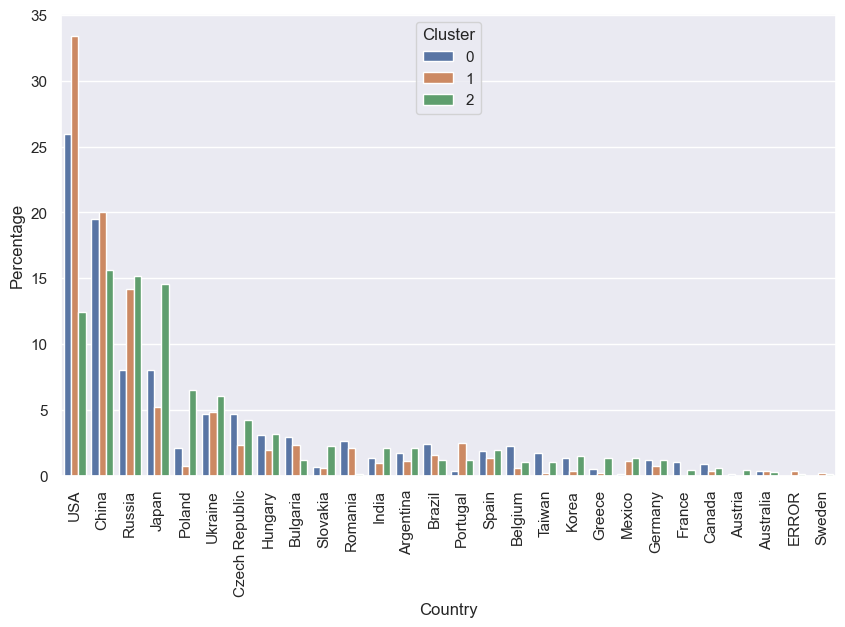

In [20]:
country_cluster_counts = first_day_passed_data[["Country", "Cluster"]].value_counts()
cluster_counts = first_day_passed_data["Cluster"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Country",
    y="Percentage",
    hue="Cluster",
    data=(
        country_cluster_counts
        * 100
        / [cluster_counts[i] for i in country_cluster_counts.reset_index()["Cluster"]]
    ).reset_index(name="Percentage"),
)
plt.xticks(rotation=90)
plt.show()

The clusters that form are
- **Cluster 1:** Exhibit slightly more positive and significantly more negative and general schizophrenic metrics than average
- **Cluster 2:** Exhibit significantly less positive, negative, and general schizophrenic metrics than average
- **Cluster 3:** Exhibit significantly more positive, and slightly more negative and general schizophrenic metrics than average
- **Cluster 4:** Exhibit less positive, a tiny bit less general, and more negative schizophrenic metrics than average
- **Cluster 5:** Exhibit slightly more positive, less negative, and the tiniest bit less general metrics than average.
In these groups, groups $1$ and $3$ would be the most important to look into because they will be the most likely to have schizophrenia-related problems, and this shows approximately what type of problems may arise in those groups ( the generally more negative problem groups with still a significant amount of positive and general, and more positive groups with a significant amount of general and less negative ). This also provides the basis for further investigation into the specifics of each metric. However, as a simple clustering algorithm, these results should be taken lightly not to mean that groups $2$ and $4$ are the only important ones.

# 3 Forecasting



In [21]:
# Get the last recorded PANSS_Total for each PatientID as our guess for week 18
data[data.Study == "E"].groupby(["PatientID"]).last().reset_index()[
    ["PatientID", "PANSS_Total"]
].to_csv("week18.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

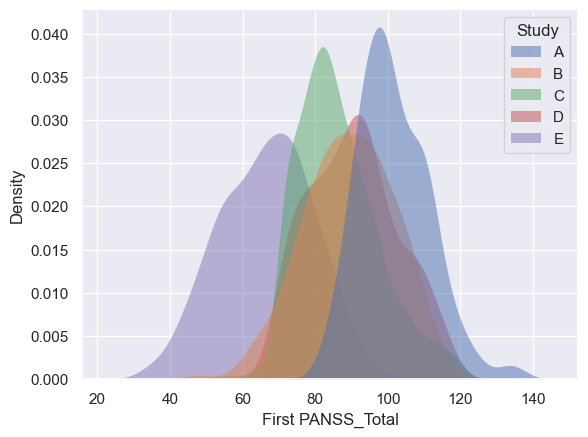

In [22]:
sns.kdeplot(
    x="PANSS_Total",
    hue="Study",
    data=data.groupby("PatientID").first(),
    fill=True,
    alpha=0.5,
    linewidth=0,
    common_norm=False,
)
plt.xlabel("First PANSS_Total")
plt.show()

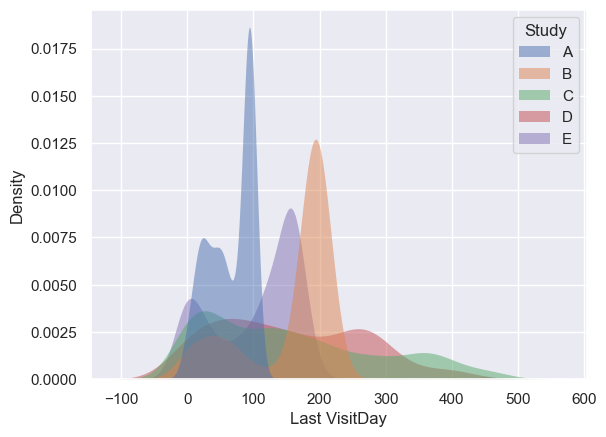

In [23]:
sns.kdeplot(
    x="VisitDay",
    hue="Study",
    data=data.groupby("PatientID").last(),
    fill=True,
    alpha=0.5,
    linewidth=0,
    common_norm=False,
)
plt.xlabel("Last VisitDay")
plt.show()

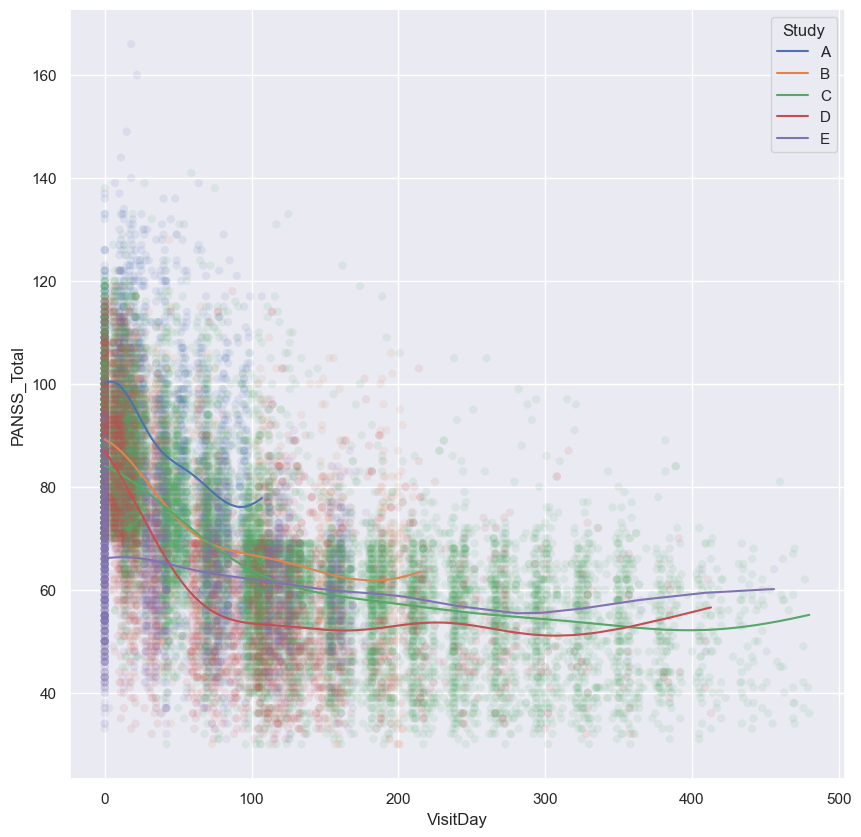

In [24]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="VisitDay",
    y="PANSS_Total",
    hue="Study",
    alpha=0.1,
    data=data.sort_values("Study"),
    linewidth=0,
    legend=False,
)
sns.lineplot(
    x="VisitDay",
    y="PANSS_Total",
    hue="Study",
    data=pd.DataFrame(
        {
            "Study": np.concatenate(
                [data[data.Study == Study].Study for Study in np.unique(data.Study)]
            ),
            "VisitDay": np.concatenate(
                [data[data.Study == Study].VisitDay for Study in np.unique(data.Study)]
            ),
            "PANSS_Total": np.concatenate(
                [
                    SVR()
                    .fit(
                        data[data.Study == Study][["VisitDay"]],
                        data[data.Study == Study].PANSS_Total,
                    )
                    .predict(data[data.Study == Study][["VisitDay"]])
                    for Study in np.unique(data.Study)
                ]
            ),
        }
    ),
)
plt.show()

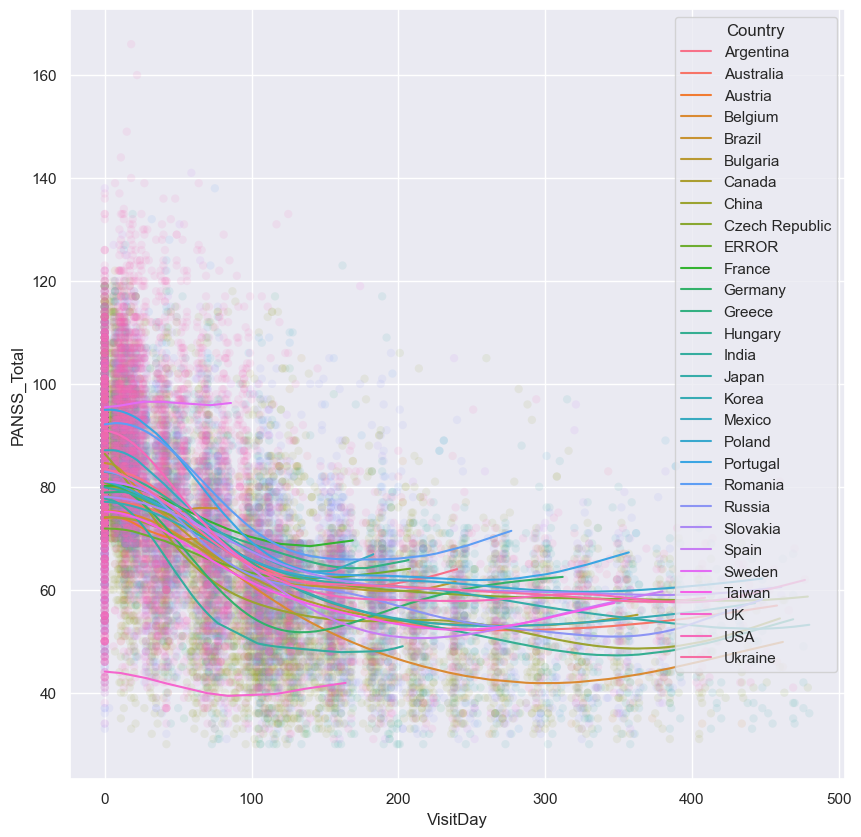

In [25]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="VisitDay",
    y="PANSS_Total",
    hue="Country",
    alpha=0.1,
    data=data.sort_values("Country"),
    linewidth=0,
    legend=False,
)
sns.lineplot(
    x="VisitDay",
    y="PANSS_Total",
    hue="Country",
    data=pd.DataFrame(
        {
            "Country": np.concatenate(
                [
                    data[(data.Country == Country)].Country
                    for Country in np.unique(data.Country)
                ]
            ),
            "VisitDay": np.concatenate(
                [
                    data[data.Country == Country].VisitDay
                    for Country in np.unique(data.Country)
                ]
            ),
            "PANSS_Total": np.concatenate(
                [
                    SVR()
                    .fit(
                        data[data.Country == Country][["VisitDay"]],
                        data[data.Country == Country].PANSS_Total,
                    )
                    .predict(data[data.Country == Country][["VisitDay"]])
                    for Country in np.unique(data.Country)
                ]
            ),
        }
    ),
)
plt.show()

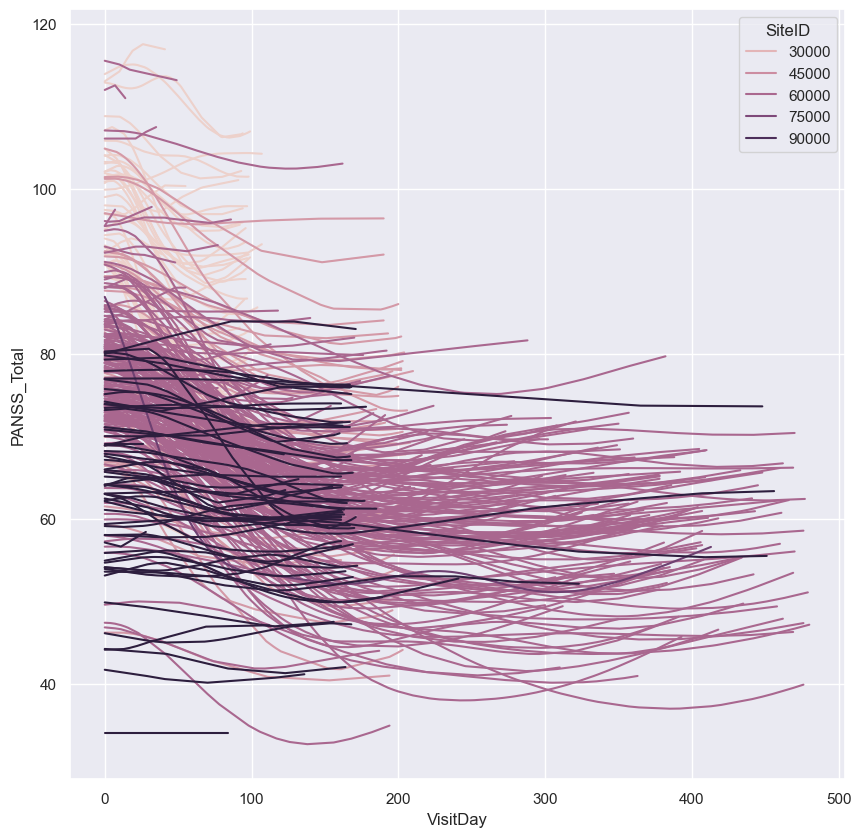

In [26]:
plt.figure(figsize=(10, 10))
sns.lineplot(
    x="VisitDay",
    y="PANSS_Total",
    hue="SiteID",
    data=pd.DataFrame(
        {
            "SiteID": np.concatenate(
                [
                    data[data.SiteID == SiteID].SiteID
                    for SiteID in np.unique(data.SiteID)
                ]
            ),
            "VisitDay": np.concatenate(
                [
                    data[data.SiteID == SiteID].VisitDay
                    for SiteID in np.unique(data.SiteID)
                ]
            ),
            "PANSS_Total": np.concatenate(
                [
                    SVR()
                    .fit(
                        data[data.SiteID == SiteID][["VisitDay"]],
                        data[data.SiteID == SiteID].PANSS_Total,
                    )
                    .predict(data[data.SiteID == SiteID][["VisitDay"]])
                    for SiteID in np.unique(data.SiteID)
                ]
            ),
        }
    ),
)
plt.show()

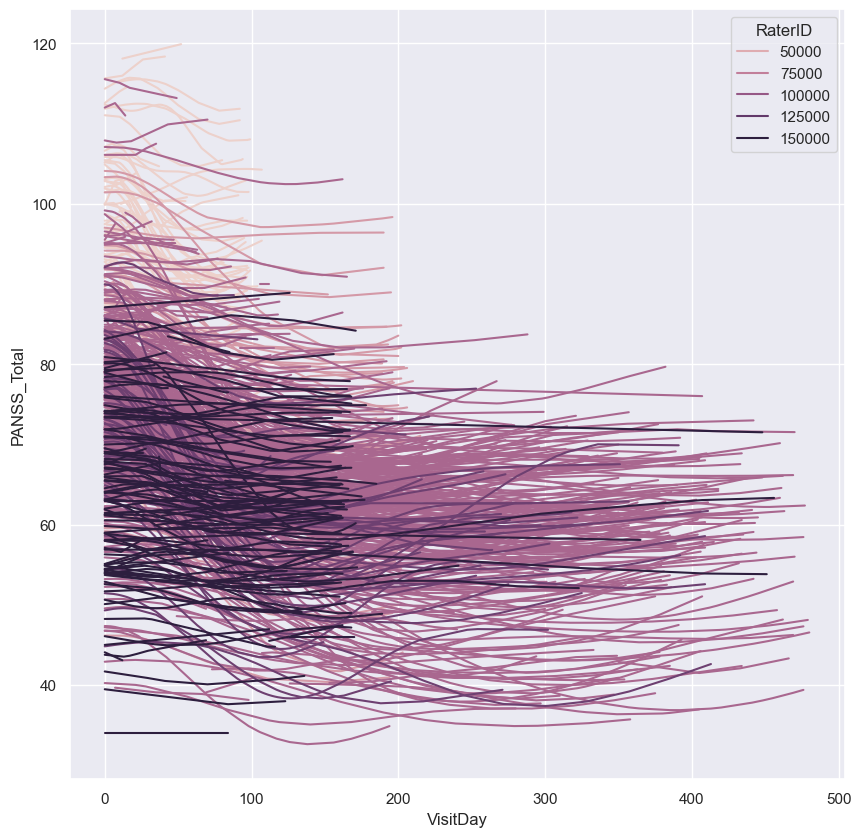

In [27]:
plt.figure(figsize=(10, 10))
sns.lineplot(
    x="VisitDay",
    y="PANSS_Total",
    hue="RaterID",
    data=pd.DataFrame(
        {
            "RaterID": np.concatenate(
                [
                    data[data.RaterID == RaterID].RaterID
                    for RaterID in np.unique(data.RaterID)
                ]
            ),
            "VisitDay": np.concatenate(
                [
                    data[data.RaterID == RaterID].VisitDay
                    for RaterID in np.unique(data.RaterID)
                ]
            ),
            "PANSS_Total": np.concatenate(
                [
                    SVR()
                    .fit(
                        data[data.RaterID == RaterID][["VisitDay"]],
                        data[data.RaterID == RaterID].PANSS_Total,
                    )
                    .predict(data[data.RaterID == RaterID][["VisitDay"]])
                    for RaterID in np.unique(data.RaterID)
                ]
            ),
        }
    ),
)
plt.show()

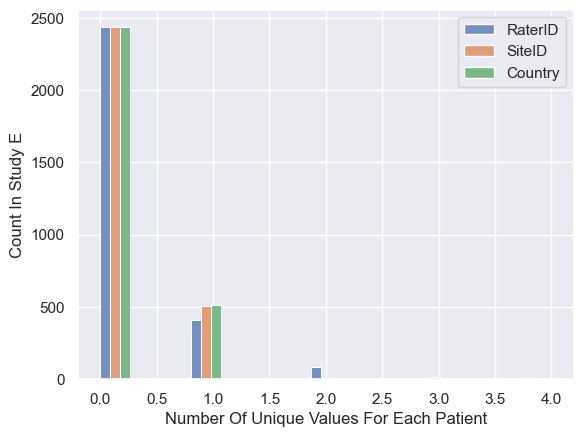

In [28]:
def number_of_unique(x):
    return pd.DataFrame(
        {
            "RaterID": [len(np.unique(x.RaterID))],
            "SiteID": [len(np.unique(x.SiteID))],
            "Country": [len(np.unique(x.Country))],
        }
    )


sns.histplot(
    data=data[data.Study == "E"].groupby("PatientID").apply(number_of_unique),
    multiple="dodge",
)
plt.xlabel("Number Of Unique Values For Each Patient")
plt.ylabel("Count In Study E")
plt.show()

In [ ]:
max_past_predictor_days = 1


def add_previous_as_context(x, number_of_observations):
    return pd.DataFrame(
        {
            **{
                f"{key}_{n}": x[key].shift(n)
                for n in range(1, number_of_observations + 1)
                for key in ["VisitDay", "PANSS_Total"]
            },
            **{
                key: x[key]
                for key in ["PANSS_Total", "Treatment", "Study", "categorySiteID"]
            },
        }
    )


tp = [
    TabularPredictor(
        label="PANSS_Total",
        eval_metric="root_mean_squared_error",
        problem_type="regression",
    ).fit(
        .groupby("PatientID")
        .apply(add_previous_as_context, number_of_observations=number_of_observations)
        .dropna(),
        presets="best_quality",
        hyperparameters={
            "KNN": {},
            "LR": {},
            "RF": {},
            "XGB": {},
            "CAT": {},
            "XT": {},
            "GBM": [
                {},
                {"extra_trees": True, "ag_args": {"name_suffix": "XT"}},
                "GBMLarge",
            ],
            "NN_TORCH": {},
            "FASTAI": {},
        },
    )
    for number_of_observations in range(1, max_past_predictor_days + 1)
]

In [ ]:
max_past_predictor_days = 2


def add_previous_as_context(x, number_of_observations):
    return pd.DataFrame(
        {
            **{
                f"{key}_{n}": x[key].shift(n)
                for n in range(1, number_of_observations + 1)
                for key in ["VisitDay", "PANSS_Total"]
            },
            **{
                key: x[key]
                for key in ["PANSS_Total", "Treatment", "Study", "categorySiteID"]
            },
        }
    )


tp = [
    TabularPredictor(
        label="PANSS_Total",
        eval_metric="root_mean_squared_error",
        problem_type="regression",
    ).fit(
        .groupby("PatientID")
        .apply(add_previous_as_context, number_of_observations=number_of_observations)
        .dropna(),
        presets="best_quality",
        hyperparameters={
            "KNN": {},
            "LR": {},
            "RF": {},
            "XGB": {},
            "CAT": {},
            "XT": {},
            "GBM": [
                {},
                {"extra_trees": True, "ag_args": {"name_suffix": "XT"}},
                "GBMLarge",
            ],
            "NN_TORCH": {},
            "FASTAI": {},
        },
    )
    for number_of_observations in range(1, max_past_predictor_days + 1)
]

In [43]:
max_past_predictor_days = 2


def add_previous_as_context(x, number_of_observations):
    return pd.DataFrame(
        {
            **{
                f"{key}_{n}": x[key].shift(n)
                for n in range(1, number_of_observations + 1)
                for key in ["VisitDay", "PANSS_Total"]
            },
            **{
                key: x[key]
                for key in ["PANSS_Total", "Treatment", "Study", "categorySiteID"]
            },
        }
    )


tp = [
    TabularPredictor(
        label="PANSS_Total",
        eval_metric="root_mean_squared_error",
        problem_type="regression",
    ).fit(
        data[data.Study == "E"]
        .groupby("PatientID")
        .apply(add_previous_as_context, number_of_observations=number_of_observations)
        .dropna(),
        presets="best_quality",
        hyperparameters={
            # "KNN": {},
            # "LR": {},
            # "RF": {},
            "XGB": {},
            # "CAT": {},
            # "XT": {},
            # "GBM": [
            #     {},
            #     {"extra_trees": True, "ag_args": {"name_suffix": "XT"}},
            #     "GBMLarge",
            # ],
            # "NN_TORCH": {},
            # "FASTAI": {},
        },
    )
    for number_of_observations in range(1, max_past_predictor_days + 1)
]

No path specified. Models will be saved in: "AutogluonModels/ag-20230814_055806/"
/var/folders/8f/dmypnd_j6h5gwtjwt90wyw680000gn/T/ipykernel_4543/1933945424.py:30: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data[data.Study == "E"]
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230814_055806/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 22.5.0: Thu Jun  8 22:22:23 PDT 2023;

In [44]:
def predict(x):
    return pd.DataFrame(
        {
            "PatientID": x.PatientID.reset_index(drop=True),
            "PANSS_Total": tp[
                min(x.Count.iloc[0] - 1, max_past_predictor_days - 1)
            ].predict(
                pd.DataFrame(
                    {
                        **{
                            f"{key}_{n}": [
                                data[data.PatientID == PatientID]
                                .sort_values("VisitDay")
                                .iloc[-n][key]
                                for PatientID in x.PatientID
                            ]
                            for key in ["VisitDay", "PANSS_Total"]
                            for n in range(1, x.Count.iloc[0] + 1)
                        },
                        **{
                            key: [
                                data[data.PatientID == PatientID]
                                .sort_values("VisitDay")
                                .iloc[-1][key]
                                for PatientID in x.PatientID
                            ]
                            for key in ["Treatment", "Study", "categorySiteID"]
                        },
                    }
                )
            ),
        }
    )


submission = (
    data[data.Study == "E"]
    .PatientID.value_counts()
    .to_frame("Count")
    .reset_index(names="PatientID")
    .groupby("Count")
    .apply(predict)
)
submission.to_csv("week18_tp.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

# 4 Classification

In [32]:
lr = make_pipeline(StandardScaler(), LogisticRegression()).fit(
    data[data.Study != "E"][
        [
            "Treatment",
            "VisitDay",
            *PANSS_parts,
        ]
    ],
    data[data.Study != "E"]["Flagged"],
)
submission = pd.DataFrame(
    {
        "AssessmentID": data[data.Study == "E"]["AssessmentID"],
        "LeadStatus": [
            x
            for x, y in lr.predict_proba(
                data[data.Study == "E"][
                    [
                        "Treatment",
                        "VisitDay",
                        *PANSS_parts,
                    ]
                ]
            )
        ],
    }
)
submission.to_csv("class_without_ID.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

In [33]:
lr = make_pipeline(StandardScaler(), LogisticRegression()).fit(
    data[data.Study != "E"][
        [
            "PatientID",
            "SiteID",
            "RaterID",
            "AssessmentID",
            "Treatment",
            "VisitDay",
            *PANSS_parts,
        ]
    ],
    data[data.Study != "E"]["Flagged"],
)
submission = pd.DataFrame(
    {
        "AssessmentID": data[data.Study == "E"]["AssessmentID"],
        "LeadStatus": [
            x
            for x, y in lr.predict_proba(
                data[data.Study == "E"][
                    [
                        "PatientID",
                        "SiteID",
                        "RaterID",
                        "AssessmentID",
                        "Treatment",
                        "VisitDay",
                        *PANSS_parts,
                    ]
                ]
            )
        ],
    }
)
submission.to_csv("class.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

/opt/homebrew/Caskroom/miniconda/base/envs/final/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
tp = TabularPredictor(
    label="Flagged", eval_metric="log_loss", problem_type="binary"
).fit(
    data[(data.Study != "E") & (data.Study != "B")][
        [
            # "Study",
            "Country",
            # "Treatment",
            "VisitDay",
            "Flagged",
            *PANSS_parts,
        ]
    ],
    data[data.Study == "B"][
        [
            # "Study",
            "Country",
            # "Treatment",
            "VisitDay",
            "Flagged",
            *PANSS_parts,
        ]
    ],
    use_bag_holdout=True,
    presets="best_quality",
    hyperparameters={
        # "KNN": {},
        # "LR": {},
        # "RF": {},
        "XGB": {},
        # "CAT": {},
        # "XT": {},
        # "GBM": [
        #     {},
        #     {"extra_trees": True, "ag_args": {"name_suffix": "XT"}},
        #     "GBMLarge",
        # ],
        # "NN_TORCH": {},
        # "FASTAI": {},
    },
)
submission = pd.DataFrame(
    {
        "AssessmentID": data[data.Study == "E"]["AssessmentID"],
        "LeadStatus": tp.predict_proba(
            data[data.Study == "E"][
                [
                    "Study",
                    "Country",
                    "Treatment",
                    "VisitDay",
                    *PANSS_parts,
                ]
            ],
            as_multiclass=False,
        ),
    }
)
submission.to_csv("class_tp.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

No path specified. Models will be saved in: "AutogluonModels/ag-20230814_052557/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230814_052557/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 22.5.0: Thu Jun  8 22:22:23 PDT 2023; root:xnu-8796.121.3~7/RELEASE_ARM64_T6020
Disk Space Avail:   252.74 GB / 494.38 GB (51.1%)
Train Data Rows:    19062
Train Data Columns: 32
Tuning Data Rows:    1885
Tuning Data Columns: 32
Label Column: Flagged
Preprocessing data ...
Selected class <--> label mapping:  class 1 = True, class 0 = False
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4033.71 MB
	Train Data (Original)  Memory Usage: 6.48 MB (0.2% of a